##  Purpose

#### The purpose of this analysis is to explore and visualize key demographic and economic trends in New York City public schools from 2017 to 2022. By examining enrollment patterns, gender ratios, racial/ethnic distributions, and economic need across boroughs, this analysis aims to identify disparities and trends that can inform policy decisions and resource allocation within the education system. The use of fact and dimension tables allows for efficient segmentation of the data, enabling detailed insights into how different factors impact the city's student population over time.

Click on this link: https://data.cityofnewyork.us/Education/2017-18-2021-22-Demographic-Snapshot/c7ru-d68s/about_data
To the right , next to the search bar , click on 'export' and then click on download. This should download a csv file named 'New_York_City_Leading_Causes_of_Death.csv' , you don't have to rename the file.
Put this file in your user dictionary

In [65]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [66]:
import pandas as pd

# Load the dataset
file_path = 'Demographic_Snapshot.csv'  # Update the path to where your file is saved
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,Borough,Year,Total Enrollment,Female,% Female,Male,% Male,Asian,% Asian,Black,...,Multi-Racial,% Multi-Racial,Native American,% Native American,White,% White,# Missing Race/Ethnicity Data,Poverty,% Poverty,Economic Need Index
0,Staten Island,2019-20,1313,656,0.500,657,0.500,73,0.056,284,...,20,0.015,8,0.006,271,0.206,1,1,79.7,75.4
1,Queens,2020-21,3294,1604,0.487,1690,0.513,964,0.293,620,...,8,0.002,36,0.011,184,0.056,49,2,78.0,76.7
2,Manhattan,2018-19,287,123,0.429,164,0.571,18,0.063,156,...,2,0.007,2,0.007,15,0.052,0,0,0.0,94.3
3,Staten Island,2021-22,375,194,0.517,181,0.483,109,0.291,10,...,12,0.032,1,0.003,142,0.379,2,275,73.3,71.9
4,Manhattan,2021-22,166,79,0.476,87,0.524,8,0.048,60,...,2,0.012,4,0.024,7,0.042,1,148,89.2,90.5


##  Detailed Exploration and Data Cleaning

1. Since the file has already been cleaned in Alteryx, we'll focus on ensuring the dataset is structured properly for the next steps. Here’s how to verify and handle any missing or inconsistent data in Python:


In [67]:
# Check the structure of the dataset
df.info()

# Check for missing values
df.isnull().sum()

# View basic statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9251 entries, 0 to 9250
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Borough                        9251 non-null   object 
 1   Year                           9251 non-null   object 
 2   Total Enrollment               9251 non-null   int64  
 3   Female                         9251 non-null   int64  
 4   % Female                       9251 non-null   float64
 5   Male                           9251 non-null   int64  
 6   % Male                         9251 non-null   float64
 7   Asian                          9251 non-null   int64  
 8   % Asian                        9251 non-null   float64
 9   Black                          9251 non-null   int64  
 10  % Black                        9251 non-null   float64
 11  Hispanic                       9251 non-null   int64  
 12  % Hispanic                     9251 non-null   f

,Total Enrollment,Female,% Female,Male,% Male,Asian,% Asian,Black,% Black,Hispanic,...,Multi-Racial,% Multi-Racial,Native American,% Native American,White,% White,# Missing Race/Ethnicity Data,Poverty,% Poverty,Economic Need Index
count,9251.000000,9251.000000,9251.00000,9251.000000,9251.000000,9251.000000,9251.000000,9251.000000,9251.000000,9251.000000,...,9251.000000,9251.000000,9251.000000,9251.000000,9251.000000,9251.000000,9251.000000,9251.000000,9251.000000,9251.000000
mean,572.180629,277.570749,0.48219,294.602638,0.517802,93.688034,0.115642,144.289590,0.306340,234.701654,...,6.943357,0.012190,6.578856,0.011767,83.452492,0.118626,2.526646,313.610096,68.160718,68.718755
std,469.888212,236.207625,0.09467,248.245303,0.094670,214.027292,0.165429,162.659205,0.260365,217.570846,...,12.736482,0.019198,14.490852,0.020796,175.480815,0.173073,8.902670,225.462712,28.537284,26.454435
min,7.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,314.000000,141.000000,0.46200,158.000000,0.487000,5.000000,0.014000,39.000000,0.079000,90.000000,...,1.000000,0.002000,1.000000,0.003000,6.000000,0.015000,0.000000,153.500000,60.900000,59.300000
50%,461.000000,221.000000,0.48900,239.000000,0.511000,17.000000,0.042000,98.000000,0.244000,178.000000,...,3.000000,0.006000,3.000000,0.007000,15.000000,0.034000,0.000000,295.000000,80.000000,78.600000
75%,672.000000,336.000000,0.51300,353.000000,0.538000,80.500000,0.145000,185.000000,0.484500,309.000000,...,7.000000,0.013000,7.000000,0.013000,75.500000,0.141000,1.000000,445.000000,87.700000,87.700000
max,6040.000000,2506.000000,1.00000,3635.000000,1.000000,3671.000000,0.943000,1493.000000,0.960000,2056.000000,...,181.000000,0.167000,355.000000,0.417000,3020.000000,0.957000,202.000000,998.000000,95.000000,95.000000


##  Business Requirements and Data Analysis Goals
Based on the business requirements (patterns in enrollment and demographic shifts), let’s define some key performance indicators (KPIs) to guide the analysis:

1. KPI 1: Total enrollment over the years by demographic group (e.g., race/ethnicity, gender, etc.).
2. KPI 2: Enrollment in special programs (e.g., English Language Learners, Special Education).
3. KPI 3: Proportion of students receiving free or reduced-price lunch across demographics.


In [68]:
# Print the column names in the dataset
print(df.columns)

Index(['Borough', 'Year', 'Total Enrollment', 'Female', '% Female', 'Male',
       '% Male', 'Asian', '% Asian', 'Black', '% Black', 'Hispanic',
       '% Hispanic', 'Multi-Racial', '% Multi-Racial', 'Native American',
       '% Native American', 'White', '% White',
       '# Missing Race/Ethnicity Data', 'Poverty', '% Poverty',
       'Economic Need Index'],
      dtype='object')


In [70]:
# Check for missing values in the entire dataset
df_clean.isnull().sum()

Borough                          0
Year                             0
Total Enrollment                 0
Female                           0
% Female                         0
Male                             0
% Male                           0
Asian                            0
% Asian                          0
Black                            0
% Black                          0
Hispanic                         0
% Hispanic                       0
Multi-Racial                     0
% Multi-Racial                   0
Native American                  0
% Native American                0
White                            0
% White                          0
# Missing Race/Ethnicity Data    0
Poverty                          0
% Poverty                        0
Economic Need Index              0
dtype: int64

In [71]:
# Checking for missing data across the dataset
missing_data = df.isnull().sum()

# Printing missing data summary
print(missing_data)

# Dropping or imputing missing values (if any exist)
df_clean = df.dropna()  # Alternatively, we can fill missing values with a placeholder if needed

# Checking for duplicates in the dataset
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Dropping duplicates if needed
df_clean = df_clean.drop_duplicates()

# Verify the changes
df_clean.info()

Borough                          0
Year                             0
Total Enrollment                 0
Female                           0
% Female                         0
Male                             0
% Male                           0
Asian                            0
% Asian                          0
Black                            0
% Black                          0
Hispanic                         0
% Hispanic                       0
Multi-Racial                     0
% Multi-Racial                   0
Native American                  0
% Native American                0
White                            0
% White                          0
# Missing Race/Ethnicity Data    0
Poverty                          0
% Poverty                        0
Economic Need Index              0
dtype: int64
Number of duplicate rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9251 entries, 0 to 9250
Data columns (total 23 columns):
 #   Column                         Non-Null Co

## Data Dictionary
I am creating a simple data dictionary to describe the fields in your dataset. This is important for defining what each column represents, its data type, and any constraints.

In this chart, we observe the gender distribution (% Female vs. % Male) across different boroughs of New York City for the 2021-22 school year.


In [72]:
# Creating a data dictionary as a DataFrame
data_dict = pd.DataFrame({
    'Column Name': df_clean.columns,
    'Data Type': df_clean.dtypes,
    'Description': [
        "The borough where the school is located",
        "Academic year (e.g., 2017-18, 2021-22)",
        "Total number of enrolled students in that year",
        "Number of female students",
        "Percentage of female students",
        "Number of male students",
        "Percentage of male students",
        "Number of Asian students",
        "Percentage of Asian students",
        "Number of Black students",
        "Percentage of Black students",
        "Number of Hispanic students",
        "Percentage of Hispanic students",
        "Number of Multi-Racial students",
        "Percentage of Multi-Racial students",
        "Number of Native American students",
        "Percentage of Native American students",
        "Number of White students",
        "Percentage of White students",
        "Missing data for race/ethnicity",
        "Number of students in poverty",
        "Percentage of students in poverty",
        "Economic Need Index, indicating the level of economic need in the school"
    ]
})

# Displaying the data dictionary in the notebook
data_dict

,Column Name,Data Type,Description
Borough,Borough,object,The borough where the school is located
Year,Year,object,"Academic year (e.g., 2017-18, 2021-22)"
Total Enrollment,Total Enrollment,int64,Total number of enrolled students in that year
Female,Female,int64,Number of female students
% Female,% Female,float64,Percentage of female students
Male,Male,int64,Number of male students
% Male,% Male,float64,Percentage of male students
Asian,Asian,int64,Number of Asian students
% Asian,% Asian,float64,Percentage of Asian students
Black,Black,int64,Number of Black students


## Chart 1: Gender Ratio Across Boroughs in 2021-22
In this chart, we observe the gender distribution (% Female vs. % Male) across different boroughs of New York City for the 2021-22 school year.

1. The gender ratio appears fairly balanced across all boroughs, with no borough showing a significant deviation from the 50% male and 50% female distribution.
2. Staten Island has the most equal gender distribution, closely matching a 50-50 split.
3. Other boroughs, such as Queens and Manhattan, show a slight male majority, while Brooklyn has a slightly higher female percentage.


<Figure size 800x600 with 0 Axes>

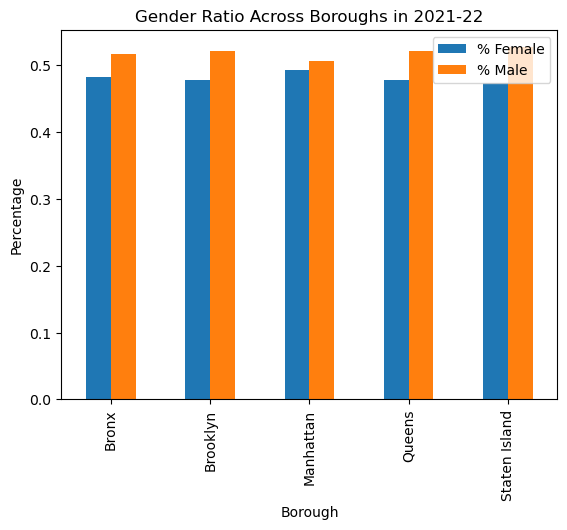

In [73]:
import matplotlib.pyplot as plt

# Filter data for 2021-22
data_2021_22 = df_clean[df_clean['Year'] == '2021-22']

# Grouping and calculating gender ratio for each borough
gender_ratio_2021_22 = data_2021_22.groupby('Borough')[['% Female', '% Male']].mean()

# Plotting the gender ratio
plt.figure(figsize=(8,6))
gender_ratio_2021_22.plot(kind='bar', title='Gender Ratio Across Boroughs in 2021-22')
plt.ylabel('Percentage')
plt.show()

## Chart 2: Enrollment Trends Over the Years
This chart depicts the total student enrollment over several years (2017-2022) across the five boroughs of New York City.

1. Enrollment has seen a general downward trend in most boroughs, particularly after 2019. This could potentially be linked to the impact of the COVID-19 pandemic, which led to changes in school enrollment, with many students switching to remote learning or leaving the school system.
2. The borough of Queens has consistently had the highest student enrollment numbers, while Staten Island has the lowest. This aligns with the population distribution of the city, as Queens is more populous than Staten Island.
3. There’s a noticeable drop in 2020-21, potentially reflecting the disruptions caused by the pandemic


<Figure size 1000x600 with 0 Axes>

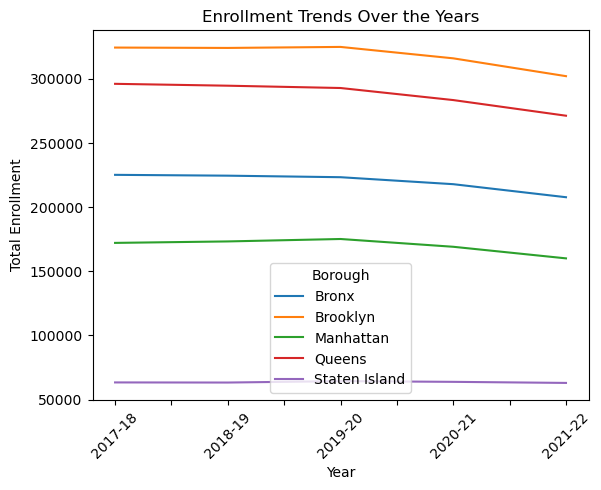

In [74]:
# Grouping and summing the total enrollment by year and borough
enrollment_trends = df_clean.groupby(['Year', 'Borough'])['Total Enrollment'].sum().unstack()

# Plotting enrollment trends
plt.figure(figsize=(10,6))
enrollment_trends.plot(title='Enrollment Trends Over the Years')
plt.ylabel('Total Enrollment')
plt.xticks(rotation=45)
plt.show()

## Chart 3: Racial/Ethnic Distribution in 2021-22
This chart provides insights into the racial and ethnic makeup of students in the NYC school system, focusing on four key racial/ethnic groups: Asian, Black, Hispanic, and White.

1. Hispanic students represent the largest racial/ethnic group across almost all boroughs, especially in the Bronx and Queens, indicating a significant Hispanic population in these areas.
2. Black students have a notably high representation in Brooklyn and the Bronx, but their numbers are lower in boroughs like Staten Island and Manhattan.
3. Asian students are more concentrated in Queens, which is known for its large immigrant and Asian communities.
4. White students have a higher proportion in Staten Island and Manhattan compared to other boroughs, reflecting the broader demographic makeup of these areas.


<Figure size 800x600 with 0 Axes>

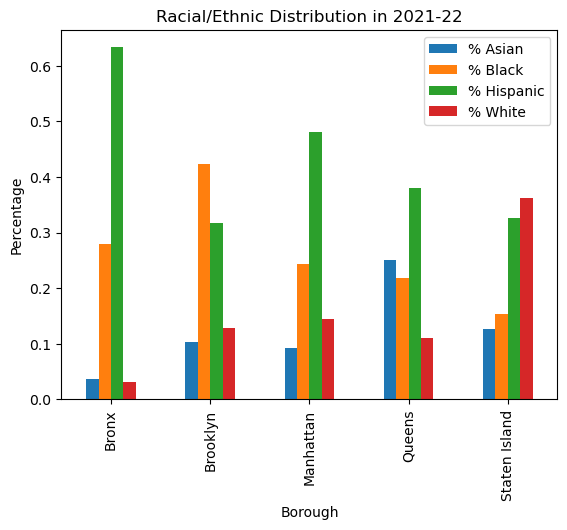

In [75]:
# Selecting a few major racial/ethnic categories
racial_distribution_2021_22 = data_2021_22.groupby('Borough')[['% Asian', '% Black', '% Hispanic', '% White']].mean()

# Plotting racial/ethnic distribution
plt.figure(figsize=(8,6))
racial_distribution_2021_22.plot(kind='bar', title='Racial/Ethnic Distribution in 2021-22')
plt.ylabel('Percentage')
plt.show()

## Chart 4: Economic Need Index Across Boroughs in 2021-22
The Economic Need Index (ENI) reflects the economic vulnerability of students within each borough, with higher values indicating greater economic need.

1. The Bronx stands out with the highest Economic Need Index, meaning students in the Bronx, on average, face the greatest economic challenges.
2. Brooklyn and Queens also show relatively high economic need, while Manhattan and Staten Island have the lowest ENI values.
3. This data can be used to target interventions such as additional funding for schools, free or subsidized school meals, and other programs that support students from economically disadvantaged backgrounds.


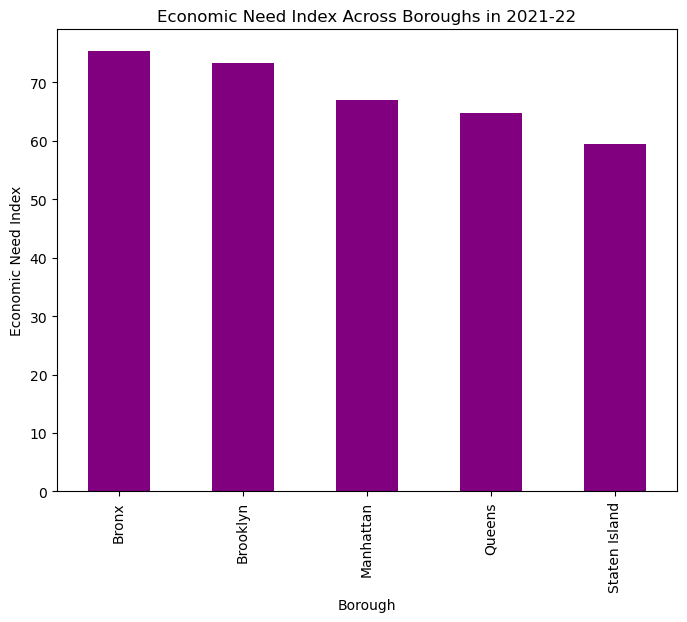

In [76]:
# Grouping and calculating the average Economic Need Index for each borough
eni_2021_22 = data_2021_22.groupby('Borough')['Economic Need Index'].mean()

# Plotting the Economic Need Index
plt.figure(figsize=(8,6))
eni_2021_22.plot(kind='bar', color='purple', title='Economic Need Index Across Boroughs in 2021-22')
plt.ylabel('Economic Need Index')
plt.show()

## Chart 4: Enrollment Trends by Race/Ethnicity (2017-2022)

All groups saw a decline during 2020-21, likely due to pandemic disruptions. While some groups show signs of recovery, overall enrollment has decreased, reflecting broader changes in NYC’s school demographics.


<Figure size 1000x600 with 0 Axes>

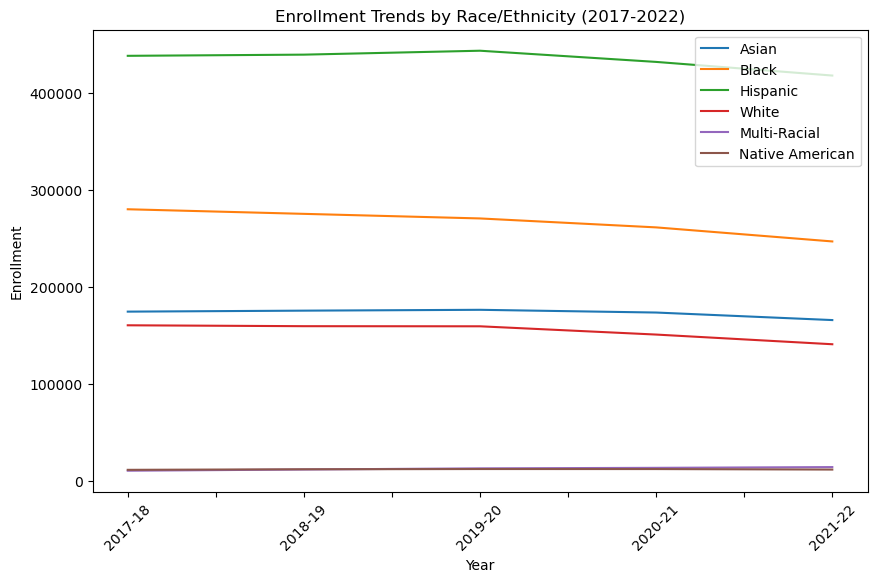

In [77]:
# Grouping enrollment data by year for each race/ethnicity
enrollment_by_race = df_clean.groupby('Year')[['Asian', 'Black', 'Hispanic', 'White', 'Multi-Racial', 'Native American']].sum()

# Plotting enrollment trends over time by race/ethnicity
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
enrollment_by_race.plot(kind='line', figsize=(10, 6))
plt.title('Enrollment Trends by Race/Ethnicity (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Enrollment')
plt.xticks(rotation=45)
plt.show()


##  Information Architecture Diagram


In [78]:
# +--------------+          +----------------+           +--------------+
# |    User      | <------> |   Data Input   | <-------> |   Analysis    |
# +--------------+          +----------------+           +--------------+
#                                   |                            |
#                                   v                            v
#                             +------------+                +--------------+
#                             |  Data Flow |                | Visualization |
#                             +------------+                +--------------+


##  Fact and Dimension Tables Overview

#### Fact Table: Contains the main metrics—Year, Borough, Total Enrollment, and Economic Need Index—allowing you to analyze enrollment and economic needs across time and regions.

#### Dimension Tables:
1. Year Dimension: Lists unique academic years to segment the data by time.
2. Borough Dimension: Lists unique boroughs for geographic analysis.

Purpose: The Fact Table holds key metrics, while Dimension Tables provide the context (year and borough) for flexible querying and analysis. Together, they enable comparisons of enrollment and economic need across different years and boroughs.


In [79]:
# Creating a basic fact table for enrollment and economic need
fact_table = df_clean[['Year', 'Borough', 'Total Enrollment', 'Economic Need Index']]

# Dimension tables
dim_year = df_clean[['Year']].drop_duplicates()
dim_borough = df_clean[['Borough']].drop_duplicates()

# Display the fact and dimension tables using Pandas
print("Fact Table:")
display(fact_table.head())  # Display the first few rows of the fact table

print("Year Dimension:")
display(dim_year.head())  # Display the first few rows of the year dimension

print("Borough Dimension:")
display(dim_borough.head())  # Display the first few rows of the borough dimension

Fact Table:


,Year,Borough,Total Enrollment,Economic Need Index
0,2019-20,Staten Island,1313,75.4
1,2020-21,Queens,3294,76.7
2,2018-19,Manhattan,287,94.3
3,2021-22,Staten Island,375,71.9
4,2021-22,Manhattan,166,90.5


Year Dimension:


,Year
0,2019-20
1,2020-21
2,2018-19
3,2021-22
8,2017-18


Borough Dimension:


,Borough
0,Staten Island
1,Queens
2,Manhattan
5,Brooklyn
9,Bronx


##  Conclusion

#### This analysis revealed declining enrollment across all racial/ethnic groups, especially during the pandemic, with Hispanic and Black students making up the largest share. The Economic Need Index showed significant disparities, with the Bronx facing the greatest economic challenges. By organizing the data into fact and dimension tables, we were able to explore these trends effectively, highlighting key differences across boroughs that can guide resource allocation and policy decisions.
